In [1]:
# load some market data for SP500 index
# create func of normalized returns
# create dataset with normalized returns
# examine it, plot it! what are its values? what are the ranges?



# create distribution function ?

# create datasets:
# market returns
# normalized returns
# 

# plot the data in normal plot

# plot data in log-log plot

# create func for pow
# create a series of data for it
# try to see if you can plot it

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm 

In [3]:
def normalized_return(mean, std, ret):
    return (ret - mean) / std

In [4]:
def distribution_function(all_points, x):
    all_points_len = len(all_points)
    points_greater_than_x = np.sum(all_points > x)

    return points_greater_than_x / all_points_len

In [5]:
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2020, 9, 1)

sp500 = web.DataReader("^GSPC", 'yahoo', start, end) # S&P 500 index

In [6]:
sp500['daily_return'] = (sp500['Adj Close'] - sp500['Open']) / sp500['Open'] * 100
# max daily return 10.7%, min daily return -20.4%

mean_of_returns = sp500['daily_return'].mean() 
std_of_returns = sp500['daily_return'].std()

# does normalization (actually standardization) need to be done? There's only one index after all
# https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff?__cf_chl_captcha_tk__=d0894f024036d64e01687dfb1e4ee71e570b4071-1600110863-0-AevMZSkw7V4rF41F1jtaevg80lCpsK24MOeZyw-it7Y_MB8Sqo8bt_uzzuck1FMYIQgHuYd2NYM4E1BDTlK_hekpMC3brqe0ZGzgu_pzTw47nZc4egWtOIKFvAQofqcs0CJciyQPznE2u-mCVeniMQ5WzEB5aMoa-AbfM5D-av5Le3mbnI9KHXFV1EX46tdC9YpL_BZDQW5AyGkLEMQ6_d-wAQR3hyinLdlQrFAywfxLSjFsGg9EJQxYQtmP-OjSrl_RHpDfyGFQuxgudrlvfXighxDwIU0rrShMRK3xQM6k5J_LKW_slcfpaVWod1rfyyOYcWLM2sNSlFoWj4GWpPx0bEDawsX3S4IMda82lYJuUMfp-_LoVQQxONs0dunO7Z3bb5QCGpARWR2DqQZjnbNpFikImemaETXNvUeTpirSQnR58FSltqW8X9JoyoeUNGggdN4UJzBH4c8DA7EsYmAzBE5QY4GDjqNoTKaKLt-WGS-x-hKgWlH5TbqGkZX21W4fWK0R_-6X92hZpUgRO7BE5f4czSua5-AGuw3XLEkvQ4W_CfBgCVp-YDKVgi9rjqrUUaqIVMZwjUxsrd6_soeomJaCVKtJqX8Z9oGw0Dfd
sp500['normalized_return'] = normalized_return(mean_of_returns, std_of_returns, sp500['daily_return'])
sp500['normalized_return_abs'] = sp500['normalized_return'].abs()

print('mean of returns:', mean_of_returns)
print('std of returns', std_of_returns)

#sp500['normalized_return']
sp500.tail()

mean of returns: 0.03716324210326685
std of returns 1.0719062404165836


,High,Low,Open,Close,Volume,Adj Close,daily_return,normalized_return,normalized_return_abs
Date,,,,,,,,,
2020-08-26,3481.070068,3444.149902,3449.969971,3478.729980,3754360000,3478.729980,0.833631,0.743038,0.743038
2020-08-27,3501.379883,3468.350098,3485.139893,3484.550049,3929560000,3484.550049,-0.016925,-0.050459,0.050459
2020-08-28,3509.229980,3484.320068,3494.689941,3508.010010,3855880000,3508.010010,0.381152,0.320913,0.320913
2020-08-31,3514.770020,3493.250000,3509.729980,3500.310059,4342290000,3500.310059,-0.268394,-0.285060,0.285060
2020-09-01,3528.030029,3494.600098,3507.439941,3526.649902,4083110000,3526.649902,0.547692,0.476281,0.476281


In [7]:
sp500.describe()

,High,Low,Open,Close,Volume,Adj Close,daily_return,normalized_return,normalized_return_abs
count,10256.000000,10256.000000,10256.000000,10256.000000,1.025600e+04,10256.000000,10256.000000,1.025600e+04,10256.000000
mean,1039.078532,1026.516919,1033.009804,1033.247534,1.723535e+09,1033.247534,0.037163,4.649384e-17,0.668549
std,788.748797,780.755818,784.956725,785.061734,1.818816e+09,785.061734,1.071906,1.000000e+00,0.743639
min,99.580002,94.230003,98.220001,98.220001,1.499000e+07,98.220001,-20.466931,-1.912863e+01,0.000037
25%,336.377502,332.622505,334.742500,334.802498,1.744900e+08,334.802498,-0.434467,-4.399917e-01,0.195752
50%,1020.039978,1000.904999,1010.415009,1010.739990,9.415000e+08,1010.739990,0.055084,1.671866e-02,0.453813
75%,1402.377472,1383.055023,1394.315033,1394.359985,3.284918e+09,1394.359985,0.541161,4.701882e-01,0.894921
max,3528.030029,3494.600098,3509.729980,3526.649902,1.145623e+10,3526.649902,10.789006,1.003058e+01,19.128626


<AxesSubplot:xlabel='Date'>

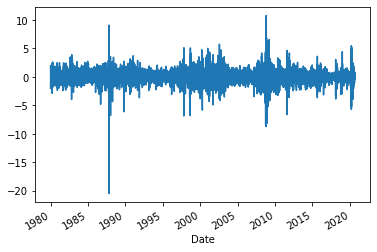

In [8]:
sp500['daily_return'].plot()

<AxesSubplot:ylabel='Frequency'>

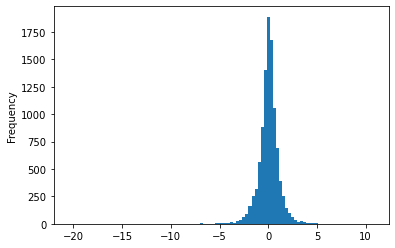

In [9]:
sp500['daily_return'].plot.hist(bins=100)

<AxesSubplot:xlabel='daily_return'>

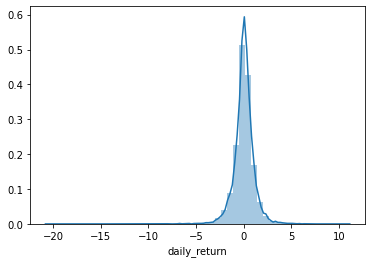

In [10]:
sns.distplot(sp500['daily_return'])

<AxesSubplot:xlabel='Date'>

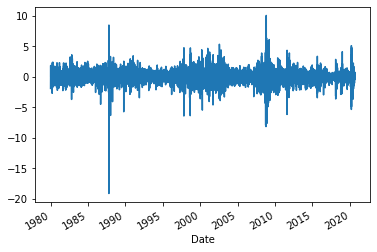

In [11]:
sp500['normalized_return'].plot()

<AxesSubplot:ylabel='Frequency'>

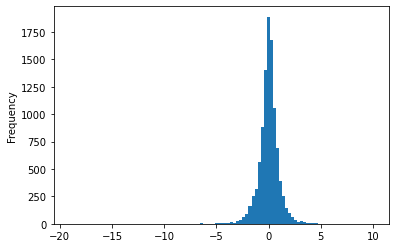

In [12]:
sp500['normalized_return'].plot.hist(bins=100)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

arr = np.array(sp500['normalized_return'])
arr2 = arr.reshape(-1, 1)
data_scaled = scaler.fit_transform(arr2)

In [14]:
data_scaled

array([[-1.91892185],
       [-0.51103427],
       [ 1.11800578],
       ...,
       [ 0.32092842],
       [-0.28507403],
       [ 0.4763042 ]])

In [15]:
sp500['normalized_return']

Date
1980-01-02   -1.918828
1980-01-03   -0.511009
1980-01-04    1.117951
1980-01-07    0.219317
1980-01-08    1.834483
                ...   
2020-08-26    0.743038
2020-08-27   -0.050459
2020-08-28    0.320913
2020-08-31   -0.285060
2020-09-01    0.476281
Name: normalized_return, Length: 10256, dtype: float64

In [16]:
print('data_scaled mean', data_scaled.mean())
print('normalized_return mean', sp500['normalized_return'].mean())
print('data_scaled std', data_scaled.std())
print('normalized_return std', sp500['normalized_return'].std())

data_scaled mean 2.6326661426368768e-17
normalized_return mean 4.649383668842675e-17
data_scaled std 1.0
normalized_return std 0.9999999999999987


<AxesSubplot:>

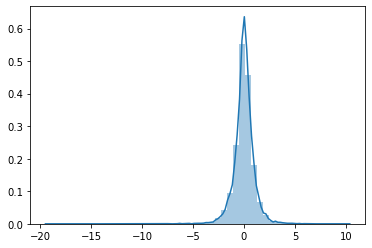

In [17]:
sns.distplot(data_scaled)

<AxesSubplot:xlabel='normalized_return'>

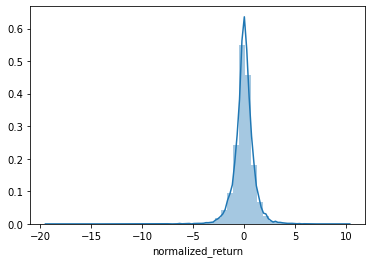

In [18]:
sns.distplot(sp500['normalized_return'])

<AxesSubplot:xlabel='daily_return'>

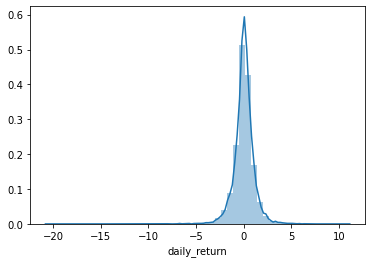

In [19]:
sns.distplot(sp500['daily_return'])

In [20]:
#df[(df.a > 1) & (df.a < 3)].sum()
#sp500['normalized_return'].sum()
np.sum(sp500['normalized_return_abs'] > 0)

10256

In [21]:
normalized_abs_returns = np.array(sp500['normalized_return_abs'])
normalized_returns = np.array(sp500['normalized_return'])

x_range = np.arange(0.01, 20, 0.01)

print(x_range)

probability_distribution_x_pairs = []

for x in x_range:
    prob = distribution_function(normalized_abs_returns, x)
    if prob == 0: break
    probability_distribution_x_pairs.append((x, prob))

[1.000e-02 2.000e-02 3.000e-02 ... 1.997e+01 1.998e+01 1.999e+01]


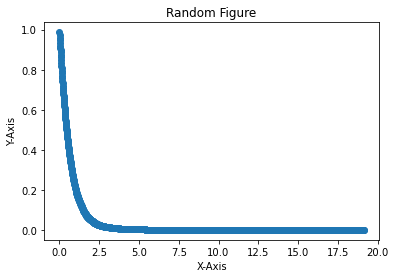

In [22]:
plt.scatter(*zip(*probability_distribution_x_pairs))
plt.title('Random Figure')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

<AxesSubplot:>

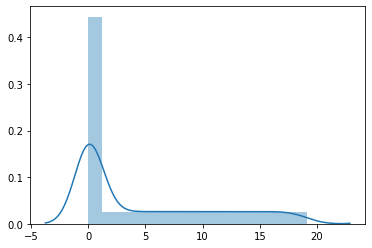

In [23]:
sns.distplot(probability_distribution_x_pairs)

In [24]:
log_probability_distribution_x_pairs = [(np.log(elem1), np.abs(np.log(elem2))) for elem1, elem2 in probability_distribution_x_pairs]

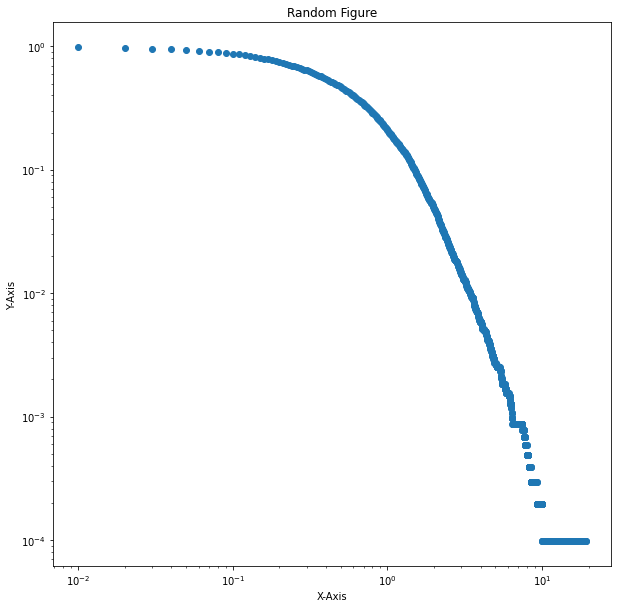

In [25]:
f, ax = plt.subplots(figsize=(10, 10))
plt.scatter(*zip(*probability_distribution_x_pairs))
plt.title('Random Figure')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.xscale('log')
plt.yscale('log')
plt.show()

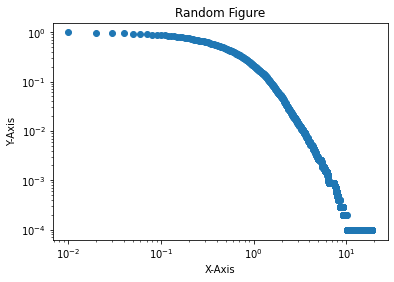

In [26]:
plt.scatter(*zip(*probability_distribution_x_pairs))
plt.title('Random Figure')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [27]:
#import powerlaw
#data = np.array(sp500['normalized_return_abs']) # data can be list or numpy array
#results = powerlaw.Fit(data)
#print(results.power_law.alpha)
#print(results.power_law.xmin)
#R, p = results.distribution_compare('power_law', 'lognormal')
#print(R)
#print(p)

In [28]:
df = pd.DataFrame(data=probability_distribution_x_pairs, columns=["x", "prob"])
df

,x,prob
0,0.01,0.986837
1,0.02,0.973479
2,0.03,0.960316
3,0.04,0.945983
4,0.05,0.933502
...,...,...
1907,19.08,0.000098
1908,19.09,0.000098
1909,19.10,0.000098
1910,19.11,0.000098


In [29]:
#model = ols('x ~ prob', data=log_probability_distribution_x_pairs).fit()
#model.summary()

In [30]:
X = np.array(df['x'])
Y = np.array(df['prob'])
X_log = np.log(X)
Y_log = np.log(Y)

In [31]:
dflog = np.log(df[['x', 'prob']])
mo = ols('prob ~ x', dflog ).fit()
mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prob   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.202e+04
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:28:42   Log-Likelihood:                -2117.0
No. Observations:                1912   AIC:                             4238.
Df Residuals:                    1910   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3113      0.037    -62.414      0.000      -2.384      -2.239
x             -2.5090      0.017   -148.384      0.000      -2.542      -2.476
==============================================================================
Omnibus:                     1475.502   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64928.318
Skew:                          -3.204   Prob(JB):                         0.00
Kurtosis:                      30.820   Cond. No.                         5.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X = sm.add_constant(X) 
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     460.0
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.33e-91
Time:                        12:28:42   Log-Likelihood:                 1457.4
No. Observations:                1912   AIC:                            -2911.
Df Residuals:                    1910   BIC:                            -2900.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1307      0.005     25.290      0.0

In [33]:
X_log = sm.add_constant(X_log) 
result = sm.OLS(Y_log, X_log).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.202e+04
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:28:42   Log-Likelihood:                -2117.0
No. Observations:                1912   AIC:                             4238.
Df Residuals:                    1910   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3113      0.037    -62.414      0.0

In [34]:
# Y=Xβ+μ, where  μ∼N(0,Σ)
# model = ols(Y, X)
# y=prop dist, x=std dev

# ln P(|x|>r) = -alfa ln x + b


#result = sm.OLS(y, x).fit() 

In [35]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.189e+06
Date:                Wed, 16 Sep 2020   Prob (F-statistic):          1.19e-244
Time:                        12:28:42   Log-Likelihood:                -133.82
No. Observations:                 100   AIC:                             273.6
Df Residuals:                      97   BIC:                             281.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0694      0.275      3.883      0.0

In [36]:
df = pd.DataFrame(data=probability_distribution_x_pairs, columns=["x", "prob"])
prob_hat = df['x'] ** (-2.5)
df.insert(loc=1, value=prob_hat, column='prob_hat')
df.head(4)

,x,prob_hat,prob
0,0.01,100000.000000,0.986837
1,0.02,17677.669530,0.973479
2,0.03,6415.002991,0.960316
3,0.04,3125.000000,0.945983


$$ log(foo) = e^{foo - bar} \zeta $$

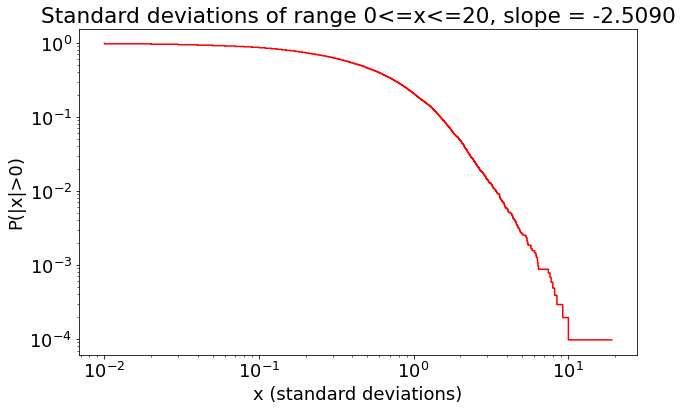

In [37]:
matplotlib.rcParams.update({'font.size': 18})
fig, axe = plt.subplots(figsize=(10, 6))

#plt.scatter(df['x'], df['prob'], s=50, color='red', label='Prob')

plt.step(df['x'], df['prob'], color='red', label='Prob')
#plt.plot(df['x'], df['prob_hat'], lw=3, color='blue', label='Prob_hat')
#plt.plot(df[['time']], df[['score_hat']], r'g*', markersize=10)
#plt.legend(loc=1)
#plt.grid(True)
#plt.title('Actual Score vs Predicted')
#plt.ylabel('Score')
#plt.xlabel('Time (in seconds)')

plt.title('Standard deviations of range 0<=x<=20, slope = -2.5090')
plt.xlabel('x (standard deviations)')
plt.ylabel('P(|x|>0)')
plt.xscale('log')
plt.yscale('log')
#plt.show()